In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Import Data

In [3]:
df = pd.read_csv("data_clean.csv")

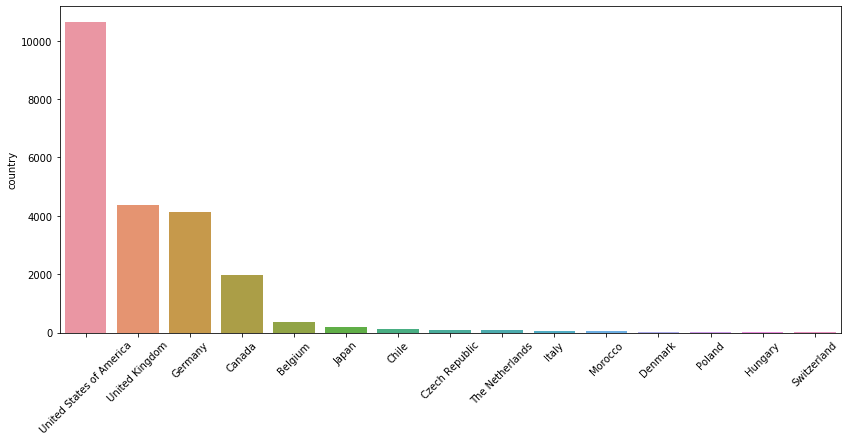

In [5]:
# Where the reviewed beers from
plt.figure(figsize=(14,6))
ax = sns.barplot(x=df.country.value_counts().head(15).index,y=df.country.value_counts().head(15))
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

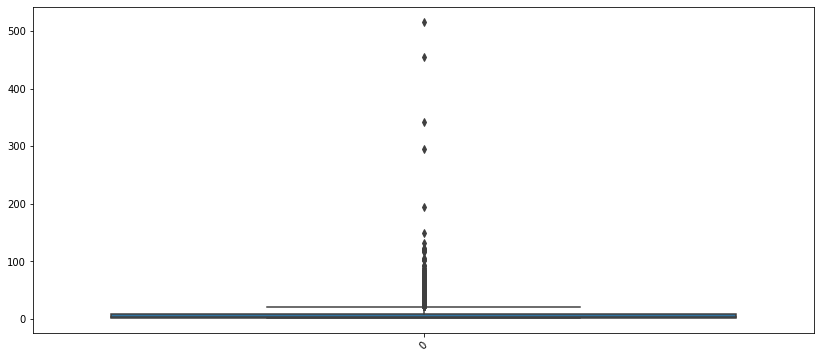

In [7]:
# amount of reviews per reviewer
plt.figure(figsize=(14,6))
ax = sns.boxplot(data = df.groupby("reviewer_name").review_content.count())
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

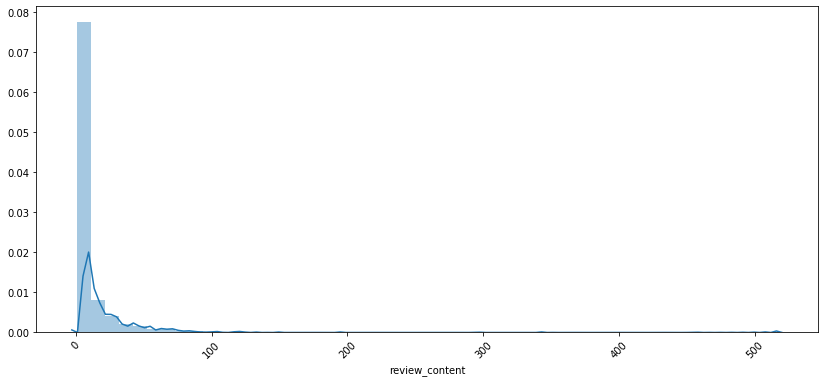

In [9]:
# easier to view than the boxplot
plt.figure(figsize=(14,6))
ax = sns.distplot(df.groupby("reviewer_name").review_content.count())
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

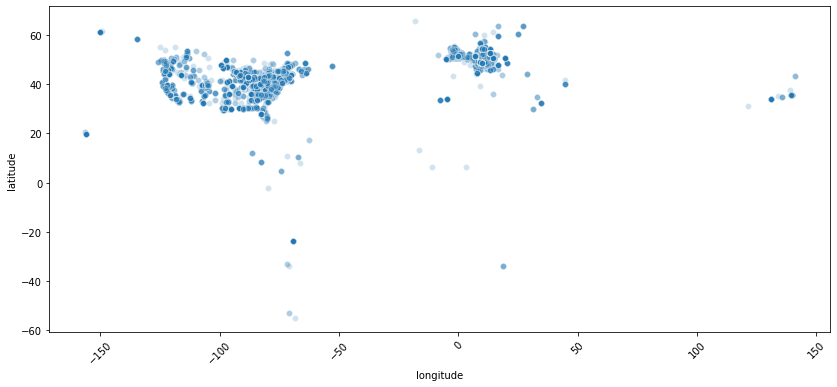

In [15]:
# visual look of where the beers are from
plt.figure(figsize=(14,6))
ax = sns.scatterplot(y=df.latitude,x=df.longitude,alpha=0.2)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()